<a href="https://colab.research.google.com/github/KaleabTessera/ICOOmen_ML_Model/blob/master/ICOData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICOOmen
# A machine Learning Model to predict ICO prices

## Introduction
In this project, we propose IcoOmen, a machine learning model which will
predict the value of an ICO token after 6 months. This uses historic
data that has been aggregated from various public websites and APIs, as well as data that has been manually
collected and calculated.

## Sections 
- Library Imports and creating useful functions.
- Create Folders if Necessary and download dateset.
- Loading ICO dataset into variables.
- Print Scatter plots of inputs vs output.
- Encoding and Splitting of Data.
- Linear Regression.
    - Finding best parameters for Linear Regression - rMSE.
    - Finding best parameters for Linear Regression - r^2. 
    - Load Saved Linear Regression Models and Print out performance.
    - Use Model to make prediction - Value of ICO after 6 months.
- Neural Network.
    - Finding best parameters for NN - rMSE.
    - Finding best parameters for NN - RSquared.
    - Load Saved Neural Network Models and Print out performance.
    - Use Model to make prediction - Value of ICO after 6 months.

## Library Imports and creating useful functions

### Importing Required Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from random import randint
from datetime import datetime
from enum import Enum
import os

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

###  Creating general functions which will be used to load/save data and other useful functions/enums.

In [4]:
class LineaReggressionMetrics(Enum):
    R_SQUARED = 1
    ROOT_MEAN_SQUARED_ERROR = 2

In [5]:
def load_dataset(dataset='./dataset/ico_data_final.csv'):
    all_data = np.genfromtxt(fname=dataset, names=True, delimiter=',')
    featureNames = all_data.dtype.names[1:-1]
    ico_names = np.genfromtxt(fname=dataset, delimiter=',', usecols=0, dtype=str,skip_header=1)
    all_data = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1)[:,1:]
    x = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1)[:,1:-1]
    y = np.genfromtxt(fname=dataset, delimiter=',',skip_header=1)[:,-1]
    return (featureNames,x,y)

In [6]:
def createFolderIfDoesntExist(folderName):
    exists = os.path.isdir(folderName)
    if not exists:
        os.makedirs(folderName)
        
    return exists

In [7]:
def createResultsFolderIfDoesntExist(folder):
    folderExists = createFolderIfDoesntExist(folder)
    if not folderExists:
      #download best models from github - mainly for google colab
      !wget https://github.com/KaleabTessera/ICOOmen_ML_Model/raw/master/results/bestRegressionModel_ROOT_MEAN_SQUARED_ERROR.sav -P "./results/"
      !wget https://github.com/KaleabTessera/ICOOmen_ML_Model/raw/master/results/bestRegressionModel_R_SQUARED.sav -P "./results/" 
      !wget https://github.com/KaleabTessera/ICOOmen_ML_Model/raw/master/results/bestNNModel_ROOT_MEAN_SQUARED_ERROR.sav -P "./results/"
      !wget https://github.com/KaleabTessera/ICOOmen_ML_Model/raw/master/results/bestNNModel_R_SQUARED.sav -P "./results/"   
    

In [8]:
# Mainly for google colab
def downloadDataifNotPresent(fileName='./dataset/ico_data_final.csv'):
    exists = os.path.isfile(fileName)
    if not exists:
      !wget https://github.com/KaleabTessera/ICOOmen_ML_Model/raw/master/dataset/ico_data_final.csv -P "./dataset/"

In [9]:
def loadModel(fileName):
    exists = os.path.isfile(fileName)
    if exists:    
        # Load a model if it exists.
        return joblib.load(fileName)
    else:
        return None

In [10]:
def makePrediction(model,example_to_predict):
    encoded_x = encodeSingleElement(x,example_to_predict)
    y_pred = model.predict(encoded_x.reshape(1, -1))
    
    return y_pred

In [11]:
# Function to calculate covariance between each input and the corresponding output. Then print a scatter plot of each input vs output.
def getCovarianceMatrixAndPrintScatterPlot(x,y,saveToFile=False):
    nrows = x.shape[0]
    ncols = x.shape[1]

    for i in np.arange(ncols):
        corCoef = np.corrcoef(x[:,i], y) 
        plt.xlabel(featureNames[i])
        plt.ylabel("Price after 6 months(in $) ")
        plt.suptitle('Scatter Plot of feature {:s} vs Price after 6 months'.format(featureNames[i]))
        corr = "Correlation Coefficient: "+str(corCoef[0,1])
        plt.title(corr)
        plt.scatter(x[:,i], y)
        if(saveToFile == True):
            createFolderIfDoesntExist("images/")
            plt.savefig('images/{:s}_vs_Price_scatter_plot.png'.format(featureNames[i]))
        else: 
            plt.show()
        
        plt.clf() 

In [12]:
# Function to Plot Performace
def plotExpectedVsPredictedOutput(y_test,y_pred,fileName='',saveToFile=False):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(y_test, y_pred,alpha=0.8,edgecolors=(0, 0, 0),s=30)
    ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title(fileName)
    if(saveToFile == True):
        createFolderIfDoesntExist("images/")
        plt.savefig('images/'+fileName+".png")
    else: 
        plt.show()


##  Create Folders if Necessary and download dateset

In [13]:
createResultsFolderIfDoesntExist("results/")

In [14]:
downloadDataifNotPresent()

## Loading ICO dataset into variables

In [15]:
featureNames,x,y = load_dataset()

## Print Scatter plots of inputs vs output

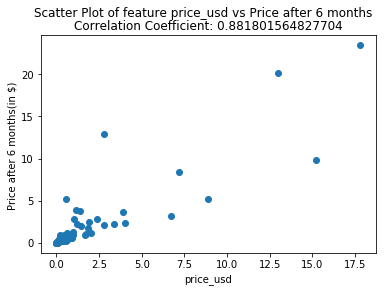

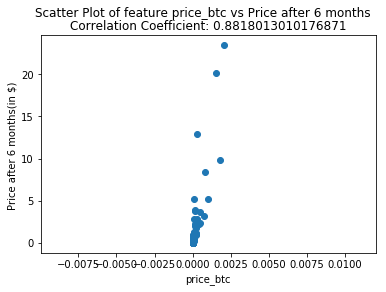

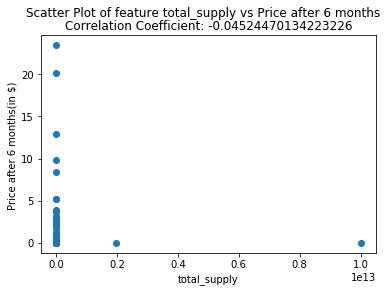

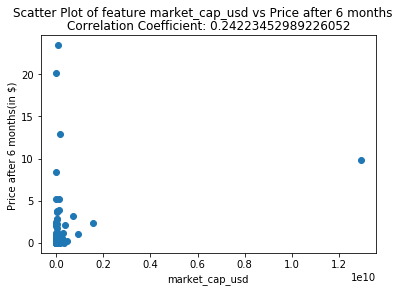

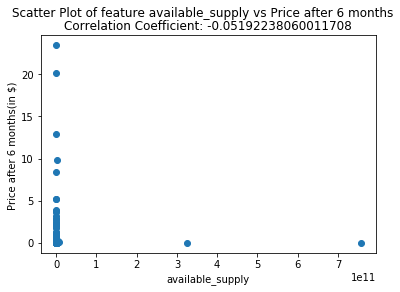

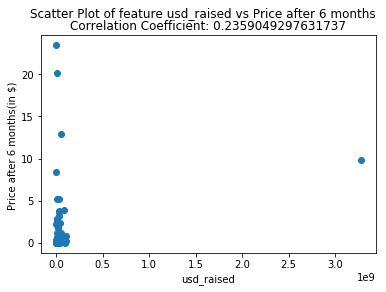

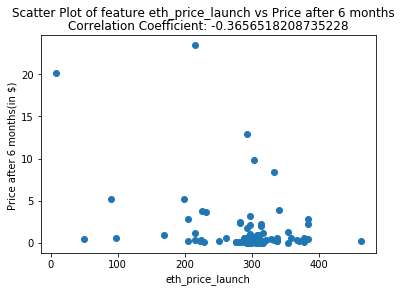

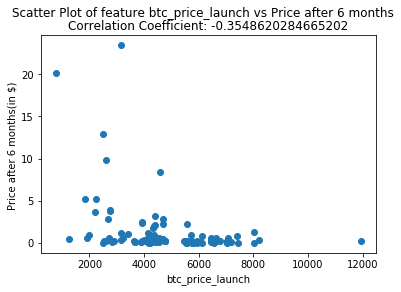

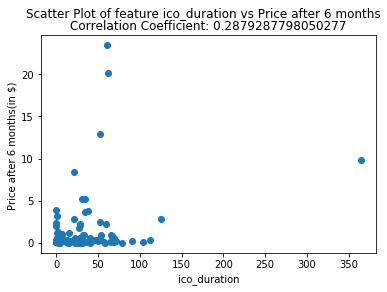

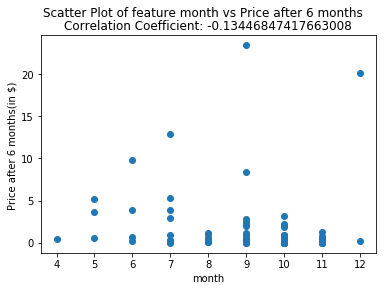

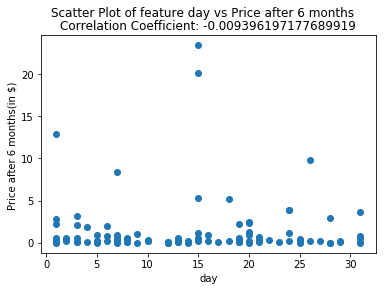

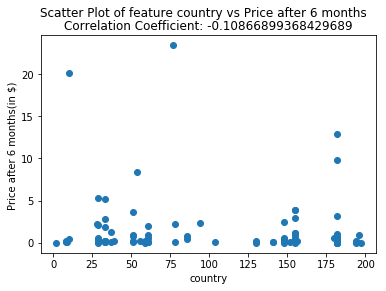

In [16]:
getCovarianceMatrixAndPrintScatterPlot(x,y)

## Encoding and Splitting of Data

### One hot encoding of categorical fields
One Hot Encoding was applied to the categorical fields -  ICO Date, ICO month launched and ICO country.

In [17]:
from sklearn.preprocessing import OneHotEncoder

def encodeData(x):
    enc = OneHotEncoder(categorical_features='all',
           handle_unknown='error', sparse=False)


    encodedCategoryArray= enc.fit_transform(x[:,8:12])
    allInputsExceptCategorical = np.delete(x, np.s_[8:12], axis=1)
    encodedX = np.concatenate((allInputsExceptCategorical,encodedCategoryArray),axis=1)
    return encodedX

def encodeSingleElement(x,sample):
    enc = OneHotEncoder(categorical_features='all',
           handle_unknown='error', sparse=False)


    encodedCategoryArray= enc.fit(x[:,8:12])
    allInputsExceptCategorical = np.delete(sample, np.s_[8:12], axis=0)
    
    encodedCategories  = enc.transform(sample[8:12].reshape(1, -1))
    encodedX = np.concatenate((allInputsExceptCategorical,encodedCategories.flatten()),axis=0)
    return encodedX

In [18]:
encodedX = encodeData(x)

### Train/Test Split and Cross Validation
Following - 80/20 split cross validation and test data. Then later, the cross validation data will also be split 80/20 to follow the holdout method.

In [19]:
X_cross, X_test_holdout, y_cross, y_test_holdout = train_test_split(encodedX, y,test_size=0.2,train_size=0.8)

# Linear Regression

## Linear Regression with train/test split - 80/20 split on Training Data

In [20]:
def ridgeRegression(x,y):
    
    X_train, X_val, y_train, y_val = train_test_split(x, y,test_size=0.2,train_size=0.8)

    regr = linear_model.Ridge(solver='svd')
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_val)

    r2 = r2_score(y_val, y_pred)
    rMeanSquaredError = sqrt(mean_squared_error(y_val, y_pred))
    return regr,rMeanSquaredError,r2

## Function to optimize results

In [21]:
## Save model only if it is performs better than current saved model
def saveBestModel(model,fileName):
    exists = os.path.isfile(fileName)
    if exists:    
        bestSavedRegressionModel = joblib.load(fileName)
    else:
        joblib.dump(model, fileName)
        return
    
    #Scores for saved model
    y_pred_holdout_saved_model = bestSavedRegressionModel.predict(X_test_holdout)
    rSquared_saved_model = r2_score(y_test_holdout, y_pred_holdout_saved_model)
    rMse_saved_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_saved_model))
    
    #Scores for new model
    y_pred_holdout_new_model = model.predict(X_test_holdout)
    rSquared_new_model = r2_score(y_test_holdout, y_pred_holdout_new_model)
    rMse_new_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_new_model))
    
    # Check if we saving to file with best rMse or rSquared value    
    if(str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) in fileName):
        if(rMse_new_model < rMse_saved_model):
            joblib.dump(model, fileName) 
    else:
        if(rSquared_new_model < rSquared_saved_model):
            joblib.dump(model, fileName)
    

In [22]:
def ridgeRegressionRunnerOptimize(metricToOptimize,numIterations,x,y,showOutput = True,saveToFile=False):
    maxRSquared = -10000
    rMSEMin = 10000
    bestRegressionCoef = np.array([])
    for i in np.arange(numIterations):
        bestRegression,rootMeanSquaredError,rSquared = ridgeRegression(x,y)
#         if you are looking for best rMSE
        if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
            if(rootMeanSquaredError < rMSEMin ):
                rMSEMin = rootMeanSquaredError
            if(showOutput):
                print(i,"bestrMSE:",rMSEMin)
#         if you are looking for best rSquared Value
        else:
            if(rSquared > maxRSquared ):
                maxRSquared = rSquared
            if(showOutput):
                print(i,"bestRSquared:",maxRSquared)
    
    crossValidationR2Squared = rSquared
    crossValidationMeanSquaredError = rootMeanSquaredError
    
    if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
        print(" \n Best rMSE: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(rMSEMin,numIterations))
        print(" \n Best rMSE using holdout data: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(crossValidationMeanSquaredError,numIterations))
    else: 
        print(" \n Best RSquared: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(maxRSquared,numIterations))
        print(" \n Best RSquared using holdout data: {:f} \n ,after running linear regression {:d} different times with different test and training combinations"
              .format(crossValidationR2Squared,numIterations))
    
    if(showOutput):
        print(" \n Best regression coef:",bestRegressionCoef,"\n")
    
    #Save Best Model
    fileName = "results/" + "bestRegressionModel_" + str(metricToOptimize.name) + ".sav"
    saveBestModel(bestRegression, fileName)

### Finding best parameters for Linear Regression - rMSE
After running linear regression with n different combinations of training and test data

In [23]:
n = 1000 #Decreased to run faster if tested.
showOutput = False
saveToFile = False
ridgeRegressionRunnerOptimize(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR,n,X_cross,y_cross,showOutput,saveToFile)


 
 Best rMSE: 0.274066 
 ,after running linear regression 100000 different times with different test and training combinations
 
 Best rMSE using holdout data: 15.747801 
 ,after running linear regression 100000 different times with different test and training combinations


### Finding best parameters for Linear Regression - r^2
After running linear regression with n different combinations of training and test data

In [24]:
n = 1000 #Decreased to run faster if tested.
showOutput = False
saveToFile = False
ridgeRegressionRunnerOptimize(LineaReggressionMetrics.R_SQUARED,n,X_cross,y_cross,showOutput,saveToFile)

 
 Best RSquared: 0.875253 
 ,after running linear regression 100000 different times with different test and training combinations
 
 Best RSquared using holdout data: -0.385233 
 ,after running linear regression 100000 different times with different test and training combinations


## Load Saved Linear Regression Models and Print out performance

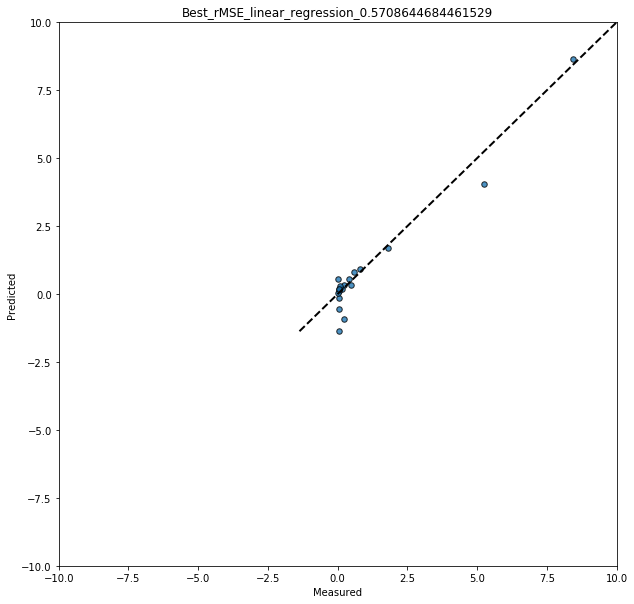

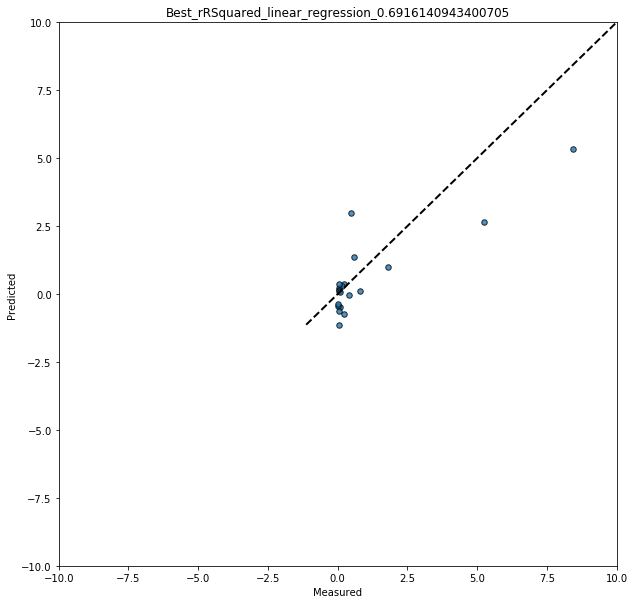

In [25]:
## Load model with best root mean squared error score 
fileName = "results/" + "bestRegressionModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + ".sav"
bestRegression_rMSE = loadModel(fileName)
saveToFile = True

if(bestRegression_rMSE):
    y_pred_holdout = bestRegression_rMSE.predict(X_test_holdout)
    holdOutMeanSquaredError = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
    heading = "Best_rMSE_linear_regression_" + str(holdOutMeanSquaredError)
    plotExpectedVsPredictedOutput(y_test_holdout,y_pred_holdout,heading,saveToFile)

## Load model with best rSquared Score
fileName = "results/" + "bestRegressionModel_" + str(LineaReggressionMetrics.R_SQUARED.name) + ".sav"
bestRegression_rSquared = loadModel(fileName)

if(bestRegression_rSquared):
    y_pred_holdout = bestRegression_rSquared.predict(X_test_holdout)
    holdOutValidationR2Squared = r2_score(y_test_holdout, y_pred_holdout)
    heading = "Best_rRSquared_linear_regression_" + str(holdOutValidationR2Squared)
    plotExpectedVsPredictedOutput(y_test_holdout,y_pred_holdout,heading,saveToFile)


# Use Model to make prediction - Value of ICO after 6 months

In [26]:
# Load model with best rMse and make prediction
fileName = "results/" + "bestRegressionModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + ".sav"
bestRegression = joblib.load(fileName)

#Example ICO
#price_usd,price_btc,total_supply,market_cap_usd,available_supply,usd_raised,eth_price_launch,btc_price_launch,ico_duration,month,day,country
example_x = np.array([1.71456,0.00019931,1000000000,905793616,528295082,24000000,297.63,3420.4,7,8,9,182])

y_pred = makePrediction(bestRegression,example_x)

print("Predicted value of example ICO after 6 months: ",y_pred )

Predicted value of example ICO after 6 months:  [0.73869841]


# Neural Network

Functions to run NN with different configurations. 

In [27]:
class Activations(Enum):
    identity = 1
    logistic = 2
    tanh    = 3
    relu = 4

class Solvers(Enum):
    lbfgs = 1
    sgd = 2
    adam = 3

In [28]:
## Save model only if it is performs better than current saved model
def saveBestModelNN(model,fileName):
    exists = os.path.isfile(fileName)
    if exists:    
        # Load best saved model.
        bestSavedNNModel = joblib.load(fileName)
    else:
        # Save current model and return.
        joblib.dump(model, fileName)
        return
    
    #Scores for saved model
    y_pred_holdout_saved_model = bestSavedNNModel.predict(X_test_holdout)
    rSquared_saved_model = r2_score(y_test_holdout, y_pred_holdout_saved_model)
    rMse_saved_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_saved_model))
    
    #Scores for new model
    y_pred_holdout_new_model = model.predict(X_test_holdout)
    rSquared_new_model = r2_score(y_test_holdout, y_pred_holdout_new_model)
    rMse_new_model = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout_new_model))
    
    # Check if we saving to file with best rMse or rSquared value    
    if(str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) in fileName):
        if(rMse_new_model < rMse_saved_model):
            joblib.dump(model, fileName) 
    else:
        if(rSquared_new_model < rSquared_saved_model):
            joblib.dump(model, fileName)
    

In [29]:
def runNN(x_input,y_input,randomState,hidden_layer_size,chosen_solver,chosen_activation):
    X_train, X_val, y_train, y_val = train_test_split(x_input, y_input,test_size=0.2,train_size=0.8,random_state=randomState)

    mlp = MLPRegressor(hidden_layer_sizes=(hidden_layer_size,hidden_layer_size,hidden_layer_size),max_iter=50000,activation=chosen_activation,
                                 solver=chosen_solver,learning_rate='adaptive',tol=0.001)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_val)
    
    R2coefficient = mlp.score(X_val, y_val)
    rMeanSquaredError = sqrt(mean_squared_error(y_val, y_pred))
    
    return R2coefficient,rMeanSquaredError,mlp,y_val

In [30]:
def runNeuralNetOptimizer(metricToOptimize,x_input,y_input,maxIterations,maxHiddenLayerSize, activation, solver, hiddenLayerStepSize=100,showOutput=False):
    bestWeights = np.array([])
    y_actual = np.array([])
    bestNeuralNetworkModel = None
    newModelIsBetterUsingMetric = False
    minrMSE = 10000
    minR2coefficient = -1000
    
    # Running the NN with various different hidden layer sizes    
    indexOfBestInteraction = 0
    for i in np.arange(maxIterations):
             for hidden_layer_size in np.arange(1,maxHiddenLayerSize,hiddenLayerStepSize):
                randomState = 42
                chosen_activation = activation
                chosen_solver =   solver
                currentR2coefficient,currentrMSE,neuralNetworkModel,y_test = runNN(x_input,y_input,randomState,hidden_layer_size,chosen_solver,chosen_activation)
                
                # Check depends on what parameter you want to optimize
                if(metricToOptimize == LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR):
                    if(minrMSE >currentrMSE ):
                        newModelIsBetterUsingMetric = True
                else:
                    if(minR2coefficient <currentR2coefficient ):
                        newModelIsBetterUsingMetric = True
                        
                        
                if(newModelIsBetterUsingMetric):
                        minrMSE = currentrMSE
                        minR2coefficient = currentR2coefficient
                        bestNeuralNetworkModel=neuralNetworkModel
                        bestRandomStateIni = randomState
                        bestNumHiddenLayers = hidden_layer_size
                        indexOfBestInteraction = i
                        y_actual = y_test
                        
    if(bestNeuralNetworkModel):
        #Best values for NN test
        print("Best rMSE for NN, using test data: " + str(minrMSE))
        print("Best rSquared for NN, using test data:" + str(minR2coefficient))

        #Best values for NN using cross validation
        y_pred_holdout = bestNeuralNetworkModel.predict(X_test_holdout)
        R2coefficientHoldout = bestNeuralNetworkModel.score(X_test_holdout, y_test_holdout)
        rMeanSquaredErrorHoldout = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
        
        print("Best rMSE for NN, using holdout data: " + str(rMeanSquaredErrorHoldout))
        print("Best rSquared for NN, using holdout data: " + str(R2coefficientHoldout))
        
        #Save best model
        fileName = "results/" + "bestNNModel_" + str(metricToOptimize.name)+".sav"
        saveBestModelNN(bestNeuralNetworkModel,fileName)

In [31]:
def runNeuralNetOptimizations2(x_input,y_input,maxIterations,maxHiddenLayerSize, activation, solver, metricToOptimize, hiddenLayerStepSize=100,showOutput=False,writeToFile=False):
    runNeuralNetOptimizer(metricToOptimize,x_input,y_input,maxIterations,maxHiddenLayerSize, activation, solver, hiddenLayerStepSize,showOutput)

In [32]:
# Commented out so that if run, it would complete in adequate time
maxIterations = 5
maxHiddenLayerSize = 1000
hiddenLayerStepSize = 100

In [33]:
def findBestParametersNN(metricToOptimize):
    y_preds = np.array([])
    rMse = np.array([])
    y_actual = np.array([])
    
    # Using tanh activation function, with Adam Solver
    print("Using tanh activation function, with Adam Solver")
    runNeuralNetOptimizations2(X_cross,y_cross,maxIterations,maxHiddenLayerSize,Activations.tanh.name,Solvers.adam.name,metricToOptimize,hiddenLayerStepSize)
    print("\n")
    
    # Using tanh activation function, with Gradient Descent Solver
    print("Using tanh activation function, with Gradient Descent Solver")
    runNeuralNetOptimizations2(X_cross,y_cross,maxIterations,maxHiddenLayerSize,Activations.tanh.name,Solvers.sgd.name,metricToOptimize,hiddenLayerStepSize)
    print("\n")


# Finding best parameters for NN - rMSE

In [34]:
findBestParametersNN(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR)

Using tanh activation function, with Adam Solver
Best rMSE for NN, using test data: 2.579216211019788
Best rSquared for NN, using test data:0.3002198648400587
Best rMSE for NN, using holdout data: 4.677480922710364
Best rSquared for NN, using holdout data: 0.4522956399141633


Using tanh activation function, with Gradient Descent Solver
Best rMSE for NN, using test data: 2.6059188219251483
Best rSquared for NN, using test data:0.28565521966584095
Best rMSE for NN, using holdout data: 4.8920304403095365
Best rSquared for NN, using holdout data: 0.40089844074292236




# Finding best parameters for NN - RSquared

In [35]:
findBestParametersNN(LineaReggressionMetrics.R_SQUARED)

Using tanh activation function, with Adam Solver
Best rMSE for NN, using test data: 2.6161257684702917
Best rSquared for NN, using test data:0.2800483233311768
Best rMSE for NN, using holdout data: 4.686465994704506
Best rSquared for NN, using holdout data: 0.45018942514967886


Using tanh activation function, with Gradient Descent Solver
Best rMSE for NN, using test data: 2.4699639282816666
Best rSquared for NN, using test data:0.35824785056850783
Best rMSE for NN, using holdout data: 4.9266338555057665
Best rSquared for NN, using holdout data: 0.3923930646178061




## Load Saved Neural Network Models and Print out performance

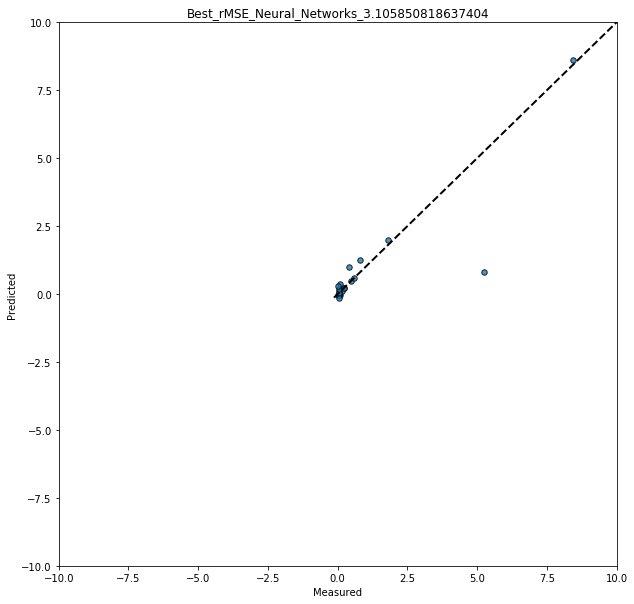

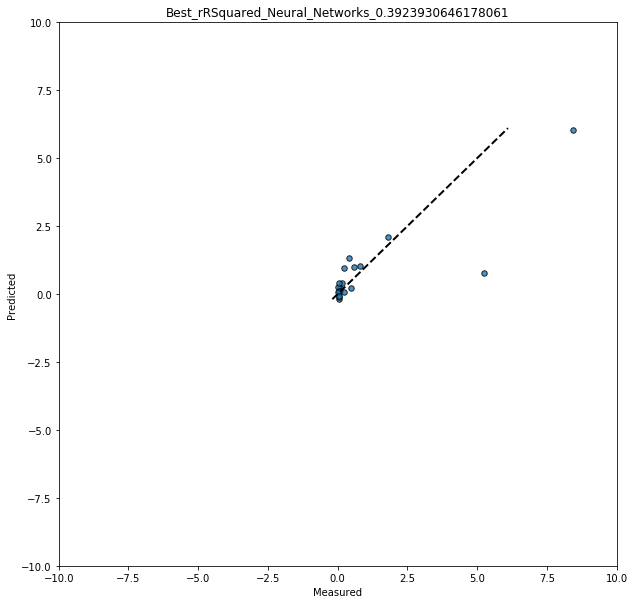

In [36]:
## Load NN model with best root mean squared error score 
fileName = "results/" + "bestNNModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + ".sav"
bestNNModel_rMse = loadModel(fileName)
saveToFile = True

if(bestNNModel_rMse):
    y_pred_holdout = bestNNModel_rMse.predict(X_test_holdout)
    holdOutMeanSquaredError = sqrt(mean_squared_error(y_test_holdout, y_pred_holdout))
    heading = "Best_rMSE_Neural_Networks_" + str(holdOutMeanSquaredError)
    plotExpectedVsPredictedOutput(y_test_holdout,y_pred_holdout,heading,saveToFile)

## Load NN model with best rSquared Score
fileName = "results/" + "bestNNModel_" + str(LineaReggressionMetrics.R_SQUARED.name) + ".sav"
bestNNModel_rSquared = loadModel(fileName)

if(bestNNModel_rSquared):
    y_pred_holdout = bestNNModel_rSquared.predict(X_test_holdout)
    holdOutValidationR2Squared = r2_score(y_test_holdout, y_pred_holdout)
    heading = "Best_rRSquared_Neural_Networks_" + str(holdOutValidationR2Squared)
    plotExpectedVsPredictedOutput(y_test_holdout,y_pred_holdout,heading,saveToFile)

# Use Model to make prediction - Value of ICO after 6 months

In [37]:
# Load model with best rMse and make prediction
fileName = "results/" + "bestNNModel_" + str(LineaReggressionMetrics.ROOT_MEAN_SQUARED_ERROR.name) + ".sav"
bestNN = joblib.load(fileName)

#Example ICO
#price_usd,price_btc,total_supply,market_cap_usd,available_supply,usd_raised,eth_price_launch,btc_price_launch,ico_duration,month,day,country
example_x = np.array([1.71456,0.00019931,1000000000,905793616,528295082,24000000,297.63,3420.4,7,8,9,182])

y_pred = makePrediction(bestNN,example_x)

print("Predicted value of example ICO after 6 months: ",y_pred )

Predicted value of example ICO after 6 months:  [1.33348905]
